In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy import signal
import pandas_datareader as web
import datetime as dt

import sklearn.model_selection

import random

In [40]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [41]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [43]:
data.keys()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [44]:
length = len(data['High'])

In [45]:
my_arr = list()
for i in range(length):
    my_arr.append(i)
    

In [77]:
data

,High,Low,Open,Close,Volume,Adj Close,label
Date,,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015,0
2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988,1
2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986,2
2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003,3
2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991,4
...,...,...,...,...,...,...,...
2021-08-17,45952.062500,44364.027344,44686.750000,44801.187500,3.219412e+10,44801.187500,2052
2021-08-18,46970.761719,43998.316406,44741.882812,46717.578125,3.720431e+10,46717.578125,2053
2021-08-19,49342.152344,46650.707031,46723.121094,49339.175781,3.470687e+10,49339.175781,2054


In [80]:
data.drop_duplicates(inplace=True)

In [82]:
data.index = my_arr

In [84]:
data.drop('label', axis = 1, inplace = True)

In [85]:
data

,High,Low,Open,Close,Volume,Adj Close
0,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
1,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
3,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
4,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2052,45952.062500,44364.027344,44686.750000,44801.187500,3.219412e+10,44801.187500
2053,46970.761719,43998.316406,44741.882812,46717.578125,3.720431e+10,46717.578125
2054,49342.152344,46650.707031,46723.121094,49339.175781,3.470687e+10,49339.175781
2055,49717.019531,48312.199219,49327.074219,48905.492188,4.058521e+10,48905.492188


In [125]:
prev_days = 60

In [126]:
rand= np.random.randint(500,1000)

In [127]:
random.seed(77)
array = list()
for i in range(300):
    temp = random.random()
    array.append(int(temp*1000))

In [128]:
array

[799,
 325,
 240,
 822,
 115,
 476,
 557,
 611,
 145,
 630,
 500,
 851,
 28,
 957,
 172,
 813,
 507,
 835,
 182,
 321,
 87,
 778,
 533,
 204,
 191,
 80,
 200,
 560,
 437,
 704,
 76,
 839,
 982,
 739,
 743,
 849,
 94,
 461,
 79,
 781,
 537,
 106,
 444,
 776,
 552,
 121,
 936,
 56,
 843,
 974,
 751,
 945,
 530,
 219,
 472,
 738,
 768,
 384,
 947,
 35,
 495,
 39,
 358,
 989,
 117,
 985,
 905,
 688,
 55,
 471,
 691,
 95,
 298,
 91,
 843,
 915,
 923,
 750,
 575,
 62,
 481,
 760,
 755,
 26,
 8,
 88,
 924,
 113,
 390,
 475,
 883,
 135,
 261,
 771,
 85,
 164,
 25,
 958,
 233,
 501,
 379,
 981,
 712,
 601,
 489,
 267,
 839,
 103,
 621,
 295,
 276,
 453,
 189,
 591,
 70,
 18,
 141,
 89,
 878,
 510,
 678,
 779,
 165,
 951,
 384,
 460,
 488,
 695,
 768,
 193,
 828,
 428,
 251,
 864,
 872,
 858,
 323,
 913,
 775,
 970,
 754,
 999,
 478,
 749,
 781,
 524,
 504,
 400,
 868,
 378,
 746,
 561,
 706,
 309,
 78,
 675,
 145,
 359,
 781,
 48,
 911,
 588,
 561,
 677,
 56,
 22,
 720,
 586,
 639,
 823,
 270,


In [132]:
train_X_dict = dict()
for i in array:
    train_X_dict[i] = data[i-60:i].values
    
    

In [144]:
train_X_dict[799]

array([[1.54975000e+04, 1.44240000e+04, 1.51237002e+04, 1.45954004e+04,
        1.66599997e+10, 1.45954004e+04],
       [1.49732998e+04, 1.36912002e+04, 1.45885000e+04, 1.49732998e+04,
        1.85008005e+10, 1.49732998e+04],
       [1.50187998e+04, 1.31059004e+04, 1.49682002e+04, 1.34057998e+04,
        1.65341000e+10, 1.34057998e+04],
       [1.42299004e+04, 1.31580996e+04, 1.34539004e+04, 1.39805996e+04,
        1.20656998e+10, 1.39805996e+04],
       [1.46595000e+04, 1.39524004e+04, 1.39524004e+04, 1.43602002e+04,
        1.27635999e+10, 1.43602002e+04],
       [1.45117998e+04, 1.32680000e+04, 1.43707998e+04, 1.37720000e+04,
        1.10840996e+10, 1.37720000e+04],
       [1.44455000e+04, 1.36417002e+04, 1.37672998e+04, 1.38197998e+04,
        1.27507999e+10, 1.38197998e+04],
       [1.38430996e+04, 1.01949004e+04, 1.38360996e+04, 1.14905000e+04,
        1.88537999e+10, 1.14905000e+04],
       [1.16780000e+04, 9.40229004e+03, 1.14310996e+04, 1.11885996e+04,
        1.88306002e+10, 

In [105]:
 train_X_dict.keys()

dict_keys([799, 325, 240, 822, 115, 476, 557, 611, 145, 630, 500, 851, 28, 957, 172, 813, 507, 835, 182, 321, 87, 778, 533, 204, 191, 80, 200, 560, 437, 704, 76, 839, 982, 739, 743, 849, 94, 461, 79, 781, 537, 106, 444, 776, 552, 121, 936, 56, 843, 974, 751, 945, 530, 219, 472, 738, 768, 384, 947, 35, 495, 39, 358, 989, 117, 985, 905, 688, 55, 471, 691, 95, 298, 91, 915, 923, 750, 575, 62, 481, 760, 755, 26, 8, 88, 924, 113, 390, 475, 883, 135, 261, 771, 85, 164, 25, 958, 233, 501, 379, 981, 712, 601, 489, 267, 103, 621, 295, 276, 453, 189, 591, 70, 18, 141, 89, 878, 510, 678, 779, 165, 951, 460, 488, 695, 193, 828, 428, 251, 864, 872, 858, 323, 913, 775, 970, 754, 999, 478, 749, 524, 504, 400, 868, 378, 746, 561, 706, 309, 78, 675, 359, 48, 911, 588, 677, 22, 720, 586, 639, 823, 270, 160, 968, 60, 515, 623, 955, 86, 702, 620, 848, 47, 748, 148, 404, 850, 4, 31, 780, 38, 784, 807, 817, 633, 824, 542, 668, 69, 550, 990, 388, 714, 178, 541, 769, 322, 468, 577, 939, 386, 659, 556, 195, 69

In [138]:
train_Y_dict = dict()
for i in array:
    train_Y_dict[i] = data['Close'][i]

In [107]:
train_Y_dict[799]

8866.0

In [139]:
train_X = list()
for i in train_X_dict.keys():
    train_X.append(train_X_dict[i])
    

In [140]:
train_Y = list()
for i in train_Y_dict.keys():
    train_Y.append(train_Y_dict[i])

In [141]:
x = list(train_X)

In [177]:
X_list = list()
for i in train_X:
    temp_list = list()
    for j in i:
        temp_list.extend(tuple(j))
    X_list.append(temp_list)
    
        
    

In [179]:
len(X_list[0])

360

In [182]:
X_list[0]

[15497.5,
 14424.0,
 15123.7001953125,
 14595.400390625,
 16659999744.0,
 14595.400390625,
 14973.2998046875,
 13691.2001953125,
 14588.5,
 14973.2998046875,
 18500800512.0,
 14973.2998046875,
 15018.7998046875,
 13105.900390625,
 14968.2001953125,
 13405.7998046875,
 16534099968.0,
 13405.7998046875,
 14229.900390625,
 13158.099609375,
 13453.900390625,
 13980.599609375,
 12065699840.0,
 13980.599609375,
 14659.5,
 13952.400390625,
 13952.400390625,
 14360.2001953125,
 12763599872.0,
 14360.2001953125,
 14511.7998046875,
 13268.0,
 14370.7998046875,
 13772.0,
 11084099584.0,
 13772.0,
 14445.5,
 13641.7001953125,
 13767.2998046875,
 13819.7998046875,
 12750799872.0,
 13819.7998046875,
 13843.099609375,
 10194.900390625,
 13836.099609375,
 11490.5,
 18853799936.0,
 11490.5,
 11678.0,
 9402.2900390625,
 11431.099609375,
 11188.599609375,
 18830600192.0,
 11188.599609375,
 12107.2998046875,
 10942.5,
 11198.7998046875,
 11474.900390625,
 15020399616.0,
 11474.900390625,
 11992.7998046875

In [183]:
train_Y[0]

8866.0

In [170]:
len(X_list[0])

60

In [146]:
len(train_Y)

267

In [191]:
my_list = []
for i in range(len(X_list)):
    if not(len(X_list[i]) == 0) :
        my_list.append(X_list[i])
    else:
        train_Y.pop(i)

        
    

In [97]:
from xgboost import XGBRegressor

In [98]:
regressor = XGBRegressor()

In [201]:
from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.95
regressor = GradientBoostingRegressor(loss='ls', alpha=alpha,
                                n_estimators=2000, max_depth=6,
                                learning_rate=0.05)

In [202]:
regressor.fit(np.array(my_list),train_Y)

GradientBoostingRegressor(alpha=0.95, learning_rate=0.05, max_depth=6,
                          n_estimators=2000)

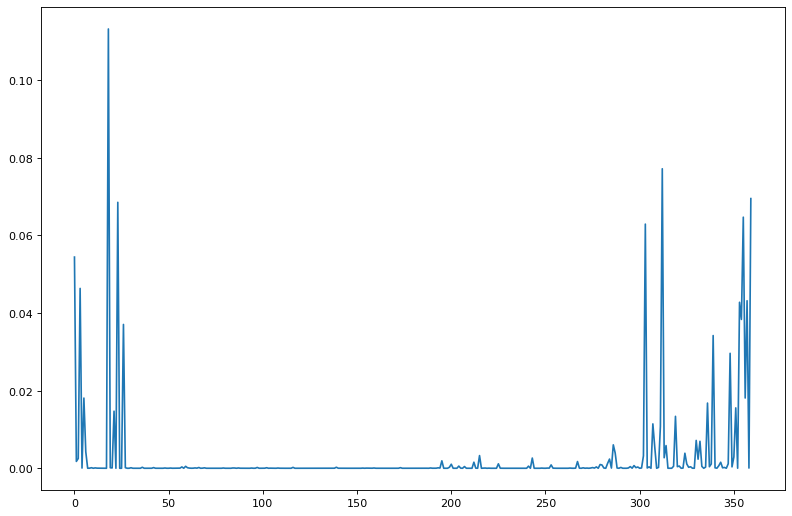

In [203]:
import matplotlib.pyplot
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.plot(regressor.feature_importances_)

In [205]:
predictions = regressor.predict(np.array(my_list))

In [206]:
sklearn.metrics.mean_absolute_error(train_Y, predictions)

2.1468549383566698e-11

In [214]:
for i in range(len(train_Y)):
    print(train_Y[i]- predictions[i])
    

-1.4551915228366852e-11
1.750777300912887e-11
3.183231456205249e-12
9.094947017729282e-13
1.63140612130519e-11
-1.318767317570746e-11
-1.6825651982799172e-11
1.3642420526593924e-11
1.7905676941154525e-11
2.5920599000528455e-11
3.319655661471188e-11
-1.6370904631912708e-11
-3.8198777474462986e-11
1.864464138634503e-11
-1.4551915228366852e-11
4.229150363244116e-11
-1.6370904631912708e-11
1.1254996934439987e-11
2.5011104298755527e-12
1.9326762412674725e-12
1.4551915228366852e-11
5.32054400537163e-11
2.5579538487363607e-11
-1.3528733688872308e-11
-3.979039320256561e-12
-1.0231815394945443e-12
-3.092281986027956e-11
4.092726157978177e-12
-1.8189894035458565e-11
1.2960299500264227e-11
1.2732925824820995e-11
3.9108272176235914e-11
1.8189894035458565e-12
-1.8189894035458565e-11
2.1827872842550278e-11
-5.9117155615240335e-12
5.093170329928398e-11
1.8701484805205837e-11
1.8189894035458565e-11
-3.774403012357652e-11
8.86757334228605e-12
-3.660716174636036e-11
-1.6370904631912708e-11
2.77395884040